# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import libraries to use in the project
import pandas as pd
import numpy as np
import os
import requests
from PIL import Image
import json
import tweepy

In [2]:
#here i read the flat file into the twitter_arc
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#using requests to get the predicted images into a tsv file and then reading it into a dataframe
folder_name = 'image_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

    
predict_img = pd.read_csv('image_predictions.tsv', sep = '\t')
predict_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#using tweepy to access Twitter API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



In [5]:
#loading lines into an api directory
api_data = []

with open("tweet-json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
            #tweet["entities"]["media"][0]["media_url"]
        except:
            print("Error.") 
#reading the details in the dictionary into a dataframe
twitter_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
twitter_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



twitter_arc_copy

In [6]:
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_arc.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Data Type
*tweet_id should be in strings as it would not be used in calculation
timestamp is an object instead of a datetime type
Missing Data
in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp and 
expanded_urls all have missing values
rating denominator of 0 and also of 170
rating_numerator above 10 even up to 1776

* Visual Assessment
from the end of the dataframe we can see that some names are incorrect and 
some dogs were not classified as either doggo floofer pupper puppo. 


In [11]:
predict_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
predict_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
predict_img.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [14]:
predict_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


some conclusions are true for each and every dog specie

In [15]:
twitter_api

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"
...,...,...,...,...,...
2349,666049248165822465,41,111,False,"[0, 120]"
2350,666044226329800704,147,311,False,"[0, 137]"
2351,666033412701032449,47,128,False,"[0, 130]"
2352,666029285002620928,48,132,False,"[0, 139]"


In [16]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   retweeted           2354 non-null   bool  
 4   display_text_range  2354 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


In [17]:
twitter_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


tweet_id is in integer instead of string

### Quality issues
1.tweet_id column in all the gathered data should be in strings and not in integer form as it would not be used for calculations

2.Timestamp is meant to be in date time and not in str

3.Certain Columns contain redundant data and should be dropped

4.Split text ranges into two sepearate columns

5.Some dogs have no name or incorrect names

6.Source column is still in HTML

7.Predictions are sometimes upper case and some other times lower case

8.on the Predicted images data the predictions have _ instead of a whitespace 

### Tidiness issues
1.All tables should be merged together as they all have tweet_id

2.Dogs were not classified together instead were given seperate columns and should be merged



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
twitter_arc_copy = twitter_arc.copy()
predict_img_copy = predict_img.copy()
twitter_api_copy = twitter_api.copy()

In [19]:
twitter_arc_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
predict_img_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
twitter_api_copy.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"


### Issue #1:tweet_id column in all the gathered data should be in strings and not in integer form as it would not be used for calculations

#### Define:Change all tweet_id columns in the tables to str

#### Code

In [22]:
#using astype to convert the tweet_id into string object
twitter_arc_copy['tweet_id'] = twitter_arc_copy.tweet_id.astype(str)
predict_img_copy['tweet_id'] = predict_img_copy.tweet_id.astype(str)
twitter_api_copy['tweet_id'] = twitter_api_copy.tweet_id.astype(str)

#### Test

In [23]:
twitter_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
predict_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [25]:
twitter_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   object
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   retweeted           2354 non-null   bool  
 4   display_text_range  2354 non-null   object
dtypes: bool(1), int64(2), object(2)
memory usage: 76.0+ KB


### Issue #2: Timestamp is meant to be in date time and not in str

#### Define
Timestamp in the twitter archive is in string instead of date time data type.
this will aid to do date kind of calculations later on

#### Code

In [26]:
#using apply to convert the column to datetime
twitter_arc_copy.timestamp = twitter_arc_copy.timestamp.apply(pd.to_datetime)

#### Test

In [27]:
twitter_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3: Certain Columns contain redundant data and should be dropped

#### Define
in the twitter_arc_copy table there are columns that are redundant with Nan values 

Code

In [28]:
#using isna to make sure null values from retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are removed
twitter_arc_copy = twitter_arc_copy[twitter_arc_copy.retweeted_status_id.isna()]

In [29]:
twitter_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [30]:
#using isna to make sure null values from in_reply_to_status_id and in_reply_to_user_id are removed
twitter_arc_copy = twitter_arc_copy[twitter_arc_copy.in_reply_to_status_id.isna()]

In [31]:
twitter_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [32]:
#this is to drop those columns on null
twitter_arc_copy.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], inplace=True, axis = 1)

Test

In [33]:
twitter_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #4: Split text ranges into two sepearate column

Define: seperate the two variables into two different columns

Code

In [34]:
#to check the display_text_range so as to know how to solve
twitter_api_copy.display_text_range[1]

[0, 138]

In [35]:
#seperating the first value in the display_text_range into a newly created lower_text_range column
twitter_api_copy["lower_text_range"] = twitter_api_copy["display_text_range"].apply(lambda x: x[0])


In [36]:
#seperating the first value in the display_text_range into a newly created upper_text_range column
twitter_api_copy["upper_text_range"] = twitter_api_copy["display_text_range"].apply(lambda x: x[1])


In [37]:
#dropping the display_text_range column as it has been seperated ino
twitter_api_copy.drop('display_text_range', axis=1)

,tweet_id,retweet_count,favorite_count,retweeted,lower_text_range,upper_text_range
0,892420643555336193,8853,39467,False,0,85
1,892177421306343426,6514,33819,False,0,138
2,891815181378084864,4328,25461,False,0,121
3,891689557279858688,8964,42908,False,0,79
4,891327558926688256,9774,41048,False,0,138
...,...,...,...,...,...,...
2349,666049248165822465,41,111,False,0,120
2350,666044226329800704,147,311,False,0,137
2351,666033412701032449,47,128,False,0,130
2352,666029285002620928,48,132,False,0,139


### Issue #5: Source column is still in HTML

Define: EXTRACT THE SOURCE from the html

Code

In [38]:
#using regex to extract the name of the sources from the html
twitter_arc_copy.source = twitter_arc_copy.source.str.extract("\>(.*?)\<", expand = True)

Test

In [39]:
twitter_arc_copy.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6: Predictions are sometimes upper case and some other times lower case

Define: convert all predictions to lower case fr uniformity

Code

In [40]:
predict_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [41]:
#using the str.lower() to convert all beginnning of words into lower case
predict_img.p1 = predict_img['p1'].str.lower() 
predict_img.p2 = predict_img['p2'].str.lower() 
predict_img.p3 = predict_img['p3'].str.lower() 

In [42]:
predict_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #7: on the Predicted images data the predictions have _ instead of a whitespace

Define: to remove underscore in the the predicted images p1 column and change it with space

Code:

In [43]:
#using .replace() to replace uderscroes with space in the breed column
predict_img = predict_img.replace('_', ' ', regex=True)

Test

In [44]:
predict_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #9: Capitalize the Dog Predicitions on the Predicted images data 

Define: change all the first characters on p1, p2, p3 colum

Code:

In [45]:
##using the str.title() to convert all beginnning of words into upper case
predict_img_copy.p1 = predict_img_copy['p1'].str.title() 
predict_img_copy.p2 = predict_img_copy['p2'].str.title() 
predict_img_copy.p3 = predict_img_copy['p3'].str.title() 

Test

In [46]:
predict_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


# TIDINESS

### Issue #1: All tables should be merged together as they all have tweet_id

Define: merging all tables as they all have have tweet_id as the primary key

Code

In [47]:
twitter_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [48]:
#using the merge() to merge the predicted image data into the twitter archive data using left join
twitter_arc_copy = pd.merge(twitter_arc_copy, predict_img_copy, on = ['tweet_id'], how = 'left')

In [49]:
#using the merge() to merge the data gotten from the twitter api into the twitter archive data using left join
twitter_arc_copy = pd.merge(twitter_arc_copy, twitter_api_copy, on = ['tweet_id'], how = 'left')

In [50]:
twitter_arc_copy.drop('display_text_range', inplace=True, axis=1)

Test

In [51]:
twitter_arc_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted,lower_text_range,upper_text_range
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.085851,False,Banana,0.076110,False,8853,39467,False,0,85
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.090647,True,Papillon,0.068957,True,6514,33819,False,0,138
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.078253,True,Kelpie,0.031379,True,4328,25461,False,0,121
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.168086,True,Spatula,0.040836,False,8964,42908,False,0,79
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774,41048,False,0,138


### Remove tweets that dont have an image

In [52]:
#since we are working on tweetes that would need an image we would remove the ones that do not have any image using the isnull 
twitter_arc_copy= twitter_arc_copy[twitter_arc_copy.jpg_url.notnull()]

In [53]:
twitter_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  jpg_url             1971 non-null 

### Issue #2: Dogs were not classified together instead were given seperate columns and should be merged

Define: All the dog stages columns should be merged into one column

In [54]:
twitter_arc_copy.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted,lower_text_range,upper_text_range
684,760252756032651264,2016-08-01 23:15:56+00:00,Twitter for iPhone,This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,...,0.154515,False,Crane,0.098040,False,995,4338,False,0,116
1641,674788554665512960,2015-12-10 03:11:43+00:00,Twitter for iPhone,Say hello to Maggie. She's a Western Septic Do...,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,...,0.154711,True,Maltese_Dog,0.134229,True,230,871,False,0,128
1998,667782464991965184,2015-11-20 19:12:01+00:00,Twitter for iPhone,Super rare dog. Endangered (?). Thinks it's fu...,https://twitter.com/dog_rates/status/667782464...,9,10,None,None,None,...,0.083011,False,African_Grey,0.054247,False,261,434,False,0,134
1287,690938899477221376,2016-01-23 16:47:25+00:00,Twitter for iPhone,"She thought the sunset was pretty, but I thoug...",https://twitter.com/dog_rates/status/690938899...,10,10,None,None,None,...,0.274888,False,Beacon,0.046397,False,2245,4536,False,0,96
627,771102124360998913,2016-08-31 21:47:27+00:00,Twitter for iPhone,This is Charlie. He works for @TODAYshow. Supe...,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,None,None,...,0.179918,True,Staffordshire_Bullterrier,0.034437,True,1663,6898,False,0,115
1181,699370870310113280,2016-02-15 23:13:03+00:00,Twitter for iPhone,Say hello to Calbert. He doesn't have enough l...,https://twitter.com/dog_rates/status/699370870...,11,10,Calbert,None,None,...,0.209130,True,Border_Terrier,0.136946,True,497,2053,False,0,139
1539,677895101218201600,2015-12-18 16:56:01+00:00,Twitter for iPhone,Guys this was terrifying. Really spooked me up...,https://twitter.com/dog_rates/status/677895101...,9,10,None,None,None,...,0.060226,True,Great_Pyrenees,0.058631,True,2384,5275,False,0,137
2037,667119796878725120,2015-11-18 23:18:48+00:00,Twitter for iPhone,This is Gabe. He is a southern Baklava. Gabe h...,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,None,None,...,0.057866,True,Toy_Poodle,0.039125,True,135,346,False,0,135
1300,690015576308211712,2016-01-21 03:38:27+00:00,Twitter for iPhone,This pupper can only sleep on shoes. It's a cr...,https://twitter.com/dog_rates/status/690015576...,12,10,None,None,None,...,0.033084,True,Eskimo_Dog,0.016663,True,836,2740,False,0,138
1165,700462010979500032,2016-02-18 23:28:52+00:00,Twitter for iPhone,This is Murphy. He's a mini golden retriever. ...,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,None,None,...,0.110268,True,Angora,0.104139,False,2031,4537,False,0,138


In [55]:
twitter_arc_copy.puppo.value_counts()

None     1948
puppo      23
Name: puppo, dtype: int64

In [56]:
twitter_arc_copy.pupper.value_counts()

None      1762
pupper     209
Name: pupper, dtype: int64

In [57]:
twitter_arc_copy.doggo.value_counts()

None     1898
doggo      73
Name: doggo, dtype: int64

In [58]:
twitter_arc_copy.floofer.value_counts()

None       1963
floofer       8
Name: floofer, dtype: int64

In [59]:
twitter_arc_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count', 'retweeted', 'lower_text_range', 'upper_text_range'],
      dtype='object')

In [60]:
#using pd.melt to melt together all the dog type columns
twitter_arc_copyy= pd.melt(twitter_arc_copy, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [61]:
#we see from here that it then increases the number of rows
twitter_arc_copyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            7884 non-null   object             
 1   timestamp           7884 non-null   datetime64[ns, UTC]
 2   source              7884 non-null   object             
 3   text                7884 non-null   object             
 4   expanded_urls       7884 non-null   object             
 5   rating_numerator    7884 non-null   int64              
 6   rating_denominator  7884 non-null   int64              
 7   name                7884 non-null   object             
 8   favorite_count      7884 non-null   int64              
 9   retweet_count       7884 non-null   int64              
 10  jpg_url             7884 non-null   object             
 11  img_num             7884 non-null   float64            
 12  p1                  7884 non-null 

In [62]:
twitter_arc_copyy.dog_type.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [63]:
#here we drop the duplicates using the drop.duplicates() function
twitter_arc_copyy = twitter_arc_copyy.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [64]:
twitter_arc_copyy.dog_type.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [65]:
#creating a doggo combined dataframe only including the tweet id's and the dog types
doggos_combined = twitter_arc_copy.drop(['timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog','retweeted','lower_text_range','upper_text_range' ], axis=1)

In [66]:
#removing from the ones that are none which may inply that the images did not have dogs 
doggos_combined = doggos_combined[doggos_combined.doggo != 'None']
doggos_combined

,tweet_id,doggo,floofer,pupper,puppo
9,890240255349198849,doggo,None,None,None
39,884162670584377345,doggo,None,None,None
86,872967104147763200,doggo,None,None,None
94,871515927908634625,doggo,None,None,None
104,869596645499047938,doggo,None,None,None
...,...,...,...,...,...
901,732375214819057664,doggo,None,None,None
924,727644517743104000,doggo,None,None,None
939,724771698126512129,doggo,None,None,None
959,719991154352222208,doggo,None,None,None


In [67]:
twitter_arc_copyy.loc[twitter_arc_copyy.tweet_id == 817777686764523521, 'dog_type'] = 'doggo'
twitter_arc_copyy.loc[twitter_arc_copyy.tweet_id == 808106460588765185, 'dog_type'] = 'None'
twitter_arc_copyy.loc[twitter_arc_copyy.tweet_id == 801115127852503040, 'dog_type'] = 'doggo'
twitter_arc_copyy.loc[twitter_arc_copyy.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
twitter_arc_copyy.loc[twitter_arc_copyy.tweet_id == 759793422261743616, 'dog_type'] = 'None'
twitter_arc_copyy.loc[twitter_arc_copyy.tweet_id == 751583847268179968, 'dog_type'] = 'None'
twitter_arc_copyy.loc[twitter_arc_copyy.tweet_id == 741067306818797568, 'dog_type'] = 'None'
twitter_arc_copyy.loc[twitter_arc_copyy.tweet_id == 733109485275860992, 'dog_type'] = 'None'

In [68]:
twitter_arc_copyy.drop('types', axis=1, inplace=True)

In [69]:
twitter_arc_copyy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
1895,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,...,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,Golden_Retriever,0.069357,True,None
1894,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326,89,...,Rottweiler,0.999091,True,Miniature_Pinscher,0.000450,True,Black-And-Tan_Coonhound,0.000157,True,None
1893,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483,257,...,Porcupine,0.989154,False,Bath_Towel,0.006300,False,Badger,0.000966,False,None
1892,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833,620,...,Goose,0.980815,False,Drake,0.006918,False,Hen,0.005255,False,None
1891,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327,96,...,Labrador_Retriever,0.825670,True,French_Bulldog,0.056639,True,Staffordshire_Bullterrier,0.054018,True,None


### 3 Different Prediction Columns

#### Define: collapse the 3 different prediction columns into a breed column using the highest confidence column as the yardstick 

Code

In [70]:
#converting the columns from the predicted images column into a singular breed column which would be the breed with the highest confidence so as to be precise
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
twitter_arc_copyy.apply(breed_confidence, axis=1)

# add lists created to master dataframe
twitter_arc_copyy['breed'] = breed
twitter_arc_copyy['confidence'] = confidence

# check the columns have been added
twitter_arc_copyy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,...,True,Leonberg,0.127998,True,Golden_Retriever,0.069357,True,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326,89,...,True,Miniature_Pinscher,0.000450,True,Black-And-Tan_Coonhound,0.000157,True,None,Rottweiler,0.999091


In [71]:
#dropping the columns just melted
twitter_arc_copyy = twitter_arc_copyy.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [72]:
twitter_arc_copyy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326,89,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091
1893,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483,257,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.000000
1892,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833,620,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.000000
1891,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327,96,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_Retriever,0.825670


In [73]:
#replacing the underscores with a space in the breed 
twitter_arc_copyy['breed'] = twitter_arc_copyy.breed.replace('_', ' ', regex=True)

Test

In [74]:
twitter_arc_copyy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,breed,confidence
3084,697990423684476929,2016-02-12 03:47:39+00:00,Twitter for iPhone,This is Doug. He's a Draconian Jabbawockee. Ra...,https://twitter.com/dog_rates/status/697990423...,11,10,Doug,3592,1451,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,None,Pembroke,0.984783
4901,711008018775851008,2016-03-19 01:54:56+00:00,Twitter for iPhone,This is Chuckles. He had a balloon but he acci...,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,3275,710,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,pupper,French Bulldog,0.731405
1957,666082916733198337,2015-11-16 02:38:37+00:00,Twitter for iPhone,Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,10,None,121,47,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,None,Pug,0.489814
3032,702321140488925184,2016-02-24 02:36:23+00:00,Twitter for iPhone,Please enjoy this picture as much as I did. 12...,https://twitter.com/dog_rates/status/702321140...,12,10,None,3604,1156,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,None,West Highland White Terrier,0.769159
2283,821886076407029760,2017-01-19 01:04:45+00:00,Twitter for iPhone,This is Jimison. He was just called a good boy...,https://twitter.com/dog_rates/status/821886076...,13,10,Jimison,12582,2692,https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg,None,Golden Retriever,0.266238


### Additional Cleaning

Incorrect names

Define: Check how to remove incorrect names and successfully change them to none so as to have uniformity

Code

In [75]:
#lets cheque the unique names of dogs in the tweets
twitter_arc_copyy.name.unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'a', 'Philippe', 'Hall',
       'Dook', 'Fwed', 'Frank', 'Kial', 'George', 'Olive', 'Calvin',
       'Naphaniel', 'Genevieve', 'Joshwa', 'Jockson', 'Jeph', 'Carll',
       'Klevin', 'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay',
       'Churlie', 'Kenneth', 'Clarence', 'Timison', 'Filup', 'Shaggy',
       'Josep', 'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis',
       'Jiminy', 'Alfie', 'Lugan', 'Christoper', 'an', 'quite', 'Walter',
       'Scout', 'Kreggory', 'Jimothy', 'the', 'Phineas', 'Cash', 'Nugget',
       'Goose', 'Venti', 'Benedict', 'Nelly', 'Dante', 'Penny', 'Aja',
       'Emmy', 'Shadow', 'Beau', 'Derek', 'Mingus', 'Maya', 'Canela',
       'such', 'Jeffrey', 'Gerald', 'Ralphus', 'Zeke', 'Jim', 'Oliver',
       'Ted', 'Bruno', 'Koda', 'Zoey', 'Jax', 'Franklin', 'Darla',
       'Archie', 'Tilly', 'Waffles', 'Jimbo', 'Steven', 'Jack', 'Duddles',
       'Bailey', 'Romeo', 'Jesse', 'Bella', 'Louis', 'Elliot', 'Gary',
       'R

In [76]:
names=[]

#function iterates through name column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
twitter_arc_copyy.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
twitter_arc_copyy['names'] = names
twitter_arc_copyy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,breed,confidence,names
1895,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint Bernard,0.381377,Biden
1894,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326,89,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091,None
1893,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483,257,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.000000,None
1892,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833,620,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.000000,None
1891,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327,96,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador Retriever,0.825670,Cupcake


In [77]:
twitter_arc_copyy.name = twitter_arc_copyy.names
twitter_arc_copyy = twitter_arc_copyy.drop('names', axis=1)

Test

In [78]:
twitter_arc_copyy.name.value_counts()

None        622
Charlie      11
Cooper       10
Lucy         10
Oliver       10
           ... 
Harrison      1
Terrance      1
Jaycob        1
Samsom        1
Betty         1
Name: name, Length: 913, dtype: int64

In [79]:
twitter_arc_copyy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326,89,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091
1893,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483,257,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.000000
1892,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833,620,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.000000
1891,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327,96,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador Retriever,0.825670


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
twitter_arc_copyy.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [81]:
#reading the archive master file in the twitter_data dataframe
twitter_data = pd.read_csv('twitter_archive_master.csv')

In [82]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1971 non-null   int64  
 1   tweet_id            1971 non-null   int64  
 2   timestamp           1971 non-null   object 
 3   source              1971 non-null   object 
 4   text                1971 non-null   object 
 5   expanded_urls       1971 non-null   object 
 6   rating_numerator    1971 non-null   int64  
 7   rating_denominator  1971 non-null   int64  
 8   name                1971 non-null   object 
 9   favorite_count      1971 non-null   int64  
 10  retweet_count       1971 non-null   int64  
 11  jpg_url             1971 non-null   object 
 12  dog_type            1971 non-null   object 
 13  breed               1971 non-null   object 
 14  confidence          1971 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 231.1+

In [83]:
twitter_data

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,breed,confidence
0,1895,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint Bernard,0.381377
1,1894,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326,89,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091
2,1893,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483,257,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.000000
3,1892,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833,620,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.000000
4,1891,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327,96,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador Retriever,0.825670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,6046,859607811541651456,2017-05-03 03:17:27+00:00,Twitter for iPhone,Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,19476,1704,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,puppo,Golden Retriever,0.895529
1967,6390,790946055508652032,2016-10-25 16:00:09+00:00,Twitter for iPhone,This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,18601,5496,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,puppo,Golden Retriever,0.245773
1968,6588,756275833623502848,2016-07-21 23:53:04+00:00,Twitter for iPhone,When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,10,None,7114,1738,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,puppo,Airedale,0.602957
1969,6443,780931614150983680,2016-09-28 00:46:20+00:00,Twitter for iPhone,I want to finally rate this iconic puppo who t...,https://twitter.com/dog_rates/status/780931614...,13,10,None,24192,8536,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,puppo,Unknown,0.000000


In [84]:
twitter_data.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,confidence
count,1971.000000,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,2968.000000,7.360418e+17,12.223237,10.477423,8949.106545,2784.449518,0.466219
std,1164.208885,6.752810e+16,41.634034,6.853275,12267.799790,4697.662893,0.339608
min,1.000000,6.660209e+17,0.000000,2.000000,81.000000,16.000000,0.000000
25%,2349.500000,6.758656e+17,10.000000,10.000000,1997.000000,628.500000,0.140969
50%,2942.000000,7.088343e+17,11.000000,10.000000,4147.000000,1367.000000,0.461076
75%,3547.500000,7.880951e+17,12.000000,10.000000,11402.500000,3239.000000,0.777087
max,7883.000000,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,0.999956


### Insights:
1.Through the analysis We could see that in Dog Type the Puppo had the highest retweet and favorite count with doggo coming a close second

2.It was noticed that the Golden retriever and the Labrador Retriever garnered the most interactions on the WeRatedDogs Twitter account

3.Samoyed and Golden Retriever have the highest average rating of all the breeds on the WeRateDogs Twitter Account

In [85]:
#importing of matplotlib as visualizations will be needed to develop insights and conclusions
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
#reading into a dataframe a groupby of dog types according to the sum of the retweeted counts
dog_type_cat_r = twitter_data.groupby('dog_type').agg({'retweet_count': ['sum']})

In [87]:
#reading into a dataframe a groupby of dog types according to the sum of the favorite counts
dog_type_cat_f = twitter_data.groupby('dog_type').agg({'favorite_count': ['sum']})

In [88]:
#we have to remove the none category from so we use the query() functions
dog_type_cat_r = dog_type_cat_r.query('dog_type != "None"')

In [89]:
#we have to remove the none category from so we use the query() functions
dog_type_cat_f = dog_type_cat_f.query('dog_type != "None"')

In [90]:
twitter_data_cat = twitter_data.query('dog_type != "None" & breed != "Unknown"')

Text(0.5, 0, 'Favorite Count')

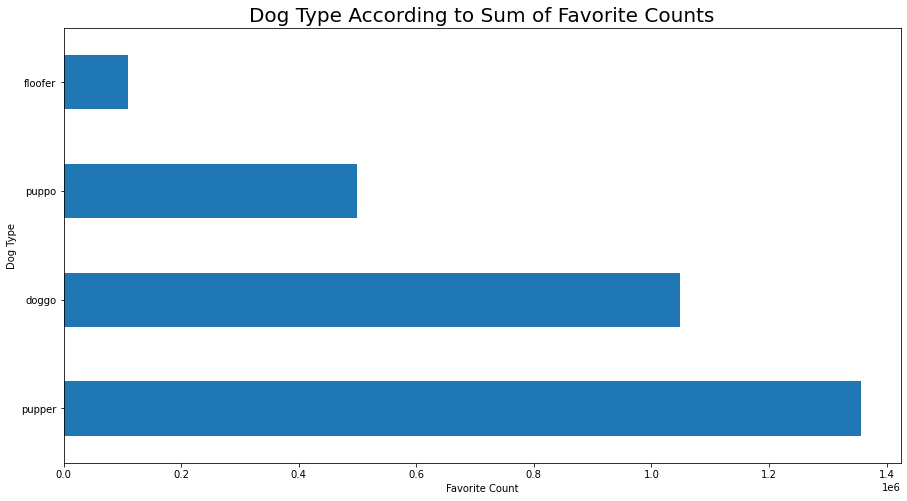

In [91]:
# showing the highest category by favorite counts
fig = plt.figure(figsize=(15,8))
twitter_data_cat.groupby('dog_type').sum()['favorite_count'].sort_values(ascending=False).nlargest(5).plot(kind='barh')
plt.title("Dog Type According to Sum of Favorite Counts", fontsize=20)
plt.ylabel("Dog Type")
plt.xlabel("Favorite Count")

Text(0.5, 0, 'Retweet Count')

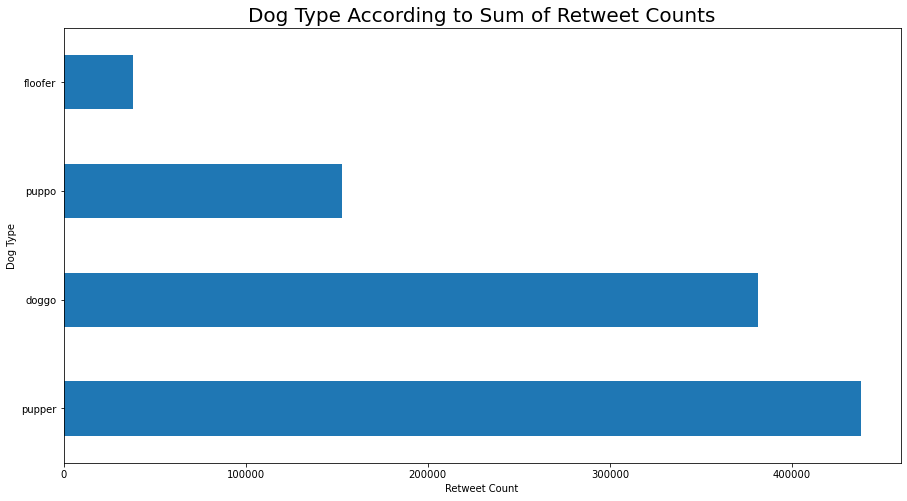

In [92]:
# showing the highest category by retweet counts
fig = plt.figure(figsize=(15,8))
twitter_data_cat.groupby('dog_type').sum()['retweet_count'].sort_values(ascending=False).nlargest(5).plot(kind='barh')
plt.title("Dog Type According to Sum of Retweet Counts", fontsize=20)
plt.ylabel("Dog Type")
plt.xlabel("Retweet Count")

#### From the above plots we can see that Pupper gets the most interactions on tweets followed by doggo

### Breed with the highest favorite and retweet count 

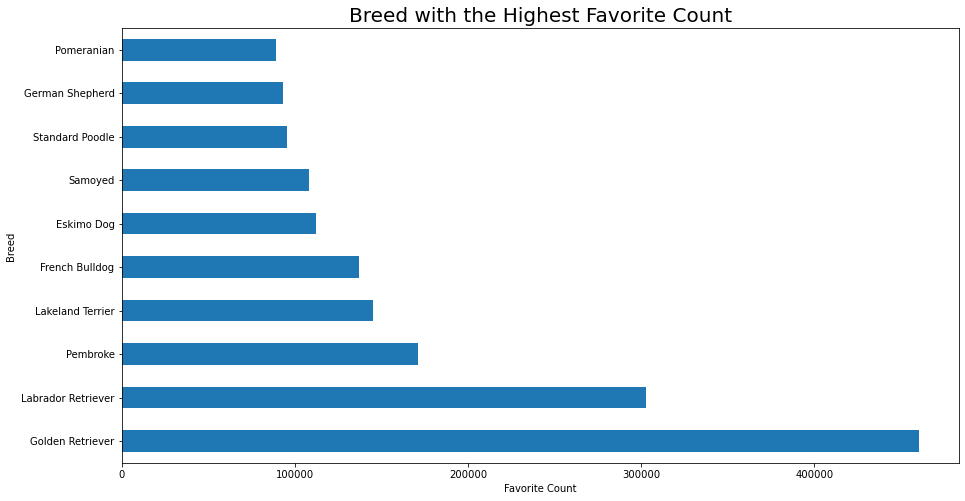

In [93]:
#grouping by breed which had the highest favorite count 
fig = plt.figure(figsize=(15,8))
twitter_data_cat.groupby('breed').sum()['favorite_count'].sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title("Breed with the Highest Favorite Count", fontsize=20)
plt.ylabel("Breed ")
plt.xlabel("Favorite Count");

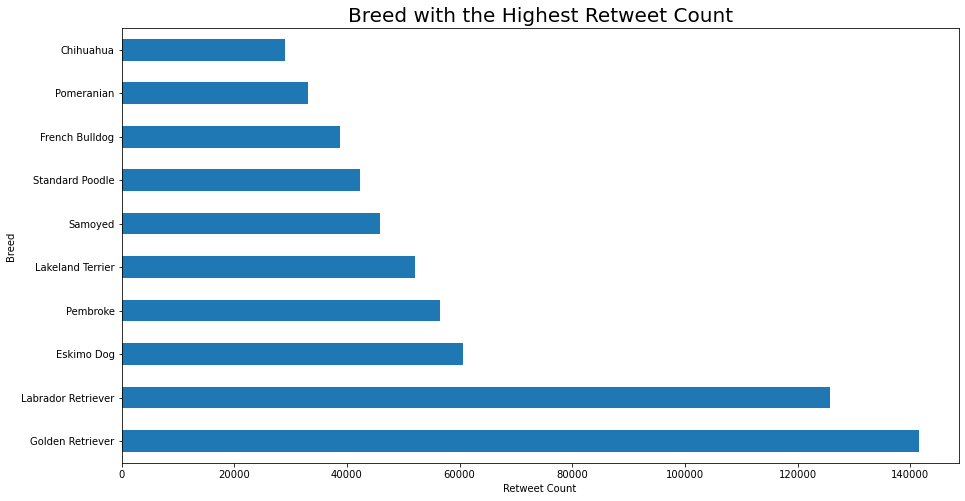

In [94]:
#grouping by breed which had the highest retweet count 
fig = plt.figure(figsize=(15,8))
twitter_data_cat.groupby('breed').sum()['retweet_count'].sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title("Breed with the Highest Retweet Count", fontsize=20)
plt.ylabel("Breed ")
plt.xlabel("Retweet Count");

#### From both plots above it is safe to say that Golden Retrievers and Labrador Retrievers command the most interactions on the WeRateDogs Twitter account

### Dog Breeds accounting to Rating 

In [95]:
no_ratings = twitter_data['breed'].value_counts()
no_ratings

Unknown                 305
Golden Retriever        156
Labrador Retriever      106
Pembroke                 94
Chihuahua                90
                       ... 
Irish Wolfhound           1
Scotch Terrier            1
Bouvier Des Flandres      1
Silky Terrier             1
Clumber                   1
Name: breed, Length: 114, dtype: int64

In [96]:
# here i have decided to use breeds of dogs which have more than 9 ratings
ave_rating = twitter_data[twitter_data['breed'].isin(no_ratings[no_ratings > 9].index)]

In [97]:
#since we do not need to know about the tweets that dont know the breeds in this particular analysis we remove it using the query() function and read it to another dataframe
ave_rating = ave_rating.query('breed != "Unknown"')

In [98]:
#for my dog rating i choose to use rating numerators of less than 14 so as to reduce thepossibility of outliers
ave_ratingg = ave_rating[ave_rating['rating_numerator'] <= 14]

In [99]:
ave_ratingg.groupby('breed')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American Staffordshire Terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Basset,17.0,10.705882,2.201270,5.0,10.00,11.0,12.00,13.0
Beagle,20.0,10.150000,1.531253,6.0,9.75,10.0,11.00,13.0
Bernese Mountain Dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim Spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border Collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0
Borzoi,9.0,10.111111,2.204793,7.0,9.00,10.0,11.00,13.0
Boston Bull,12.0,9.416667,2.108784,5.0,8.75,10.0,11.00,12.0


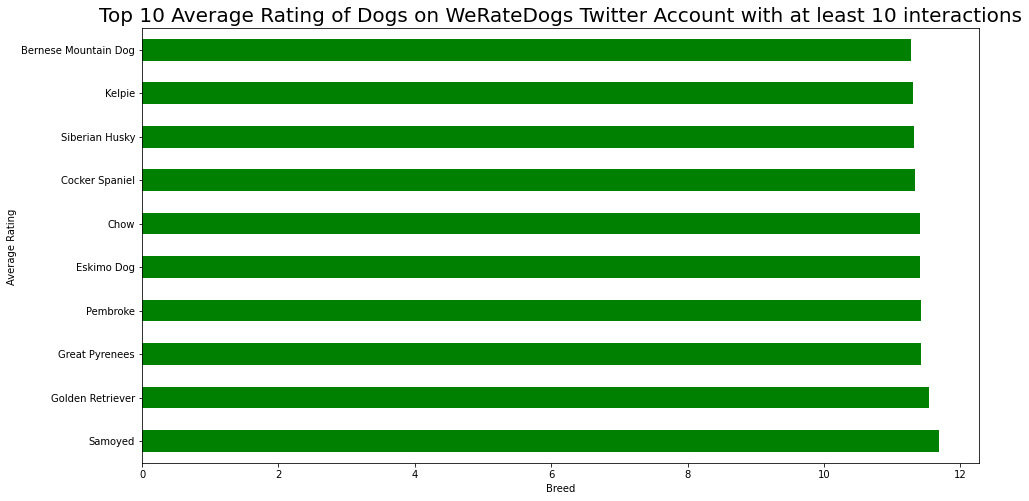

In [100]:
fig = plt.figure(figsize=(15,8))
ave_ratingg.groupby('breed')['rating_numerator'].mean().sort_values(ascending=True).nlargest(10).plot(kind='barh', color='green')
plt.title("Top 10 Average Rating of Dogs on WeRateDogs Twitter Account with at least 10 interactions", fontsize=20)
plt.ylabel("Average Rating ")
plt.xlabel("Breed");

In [101]:
ave_ratingg.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False).nlargest(10)

breed
Samoyed                 11.690476
Golden Retriever        11.538961
Great Pyrenees          11.428571
Pembroke                11.425532
Eskimo Dog              11.409091
Chow                    11.404255
Cocker Spaniel          11.333333
Siberian Husky          11.315789
Kelpie                  11.307692
Bernese Mountain Dog    11.272727
Name: rating_numerator, dtype: float64

#### From the above plot we can see that Samoyed and Golden Retriever have the highest average rating of all the breeds on the WeRateDogs Twitter Account

### SOURCES

#### Udacity Data Wrangling Week 2

https://pandas.pydata.org



https://stackoverflow.com/questions


https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf


https://nocodewebscraping.com/twitter-json-examples/


https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/